# Решающие деревья (decision trees)

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## Принцип работы и визуализация


In [1]:
# классификация
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [2]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



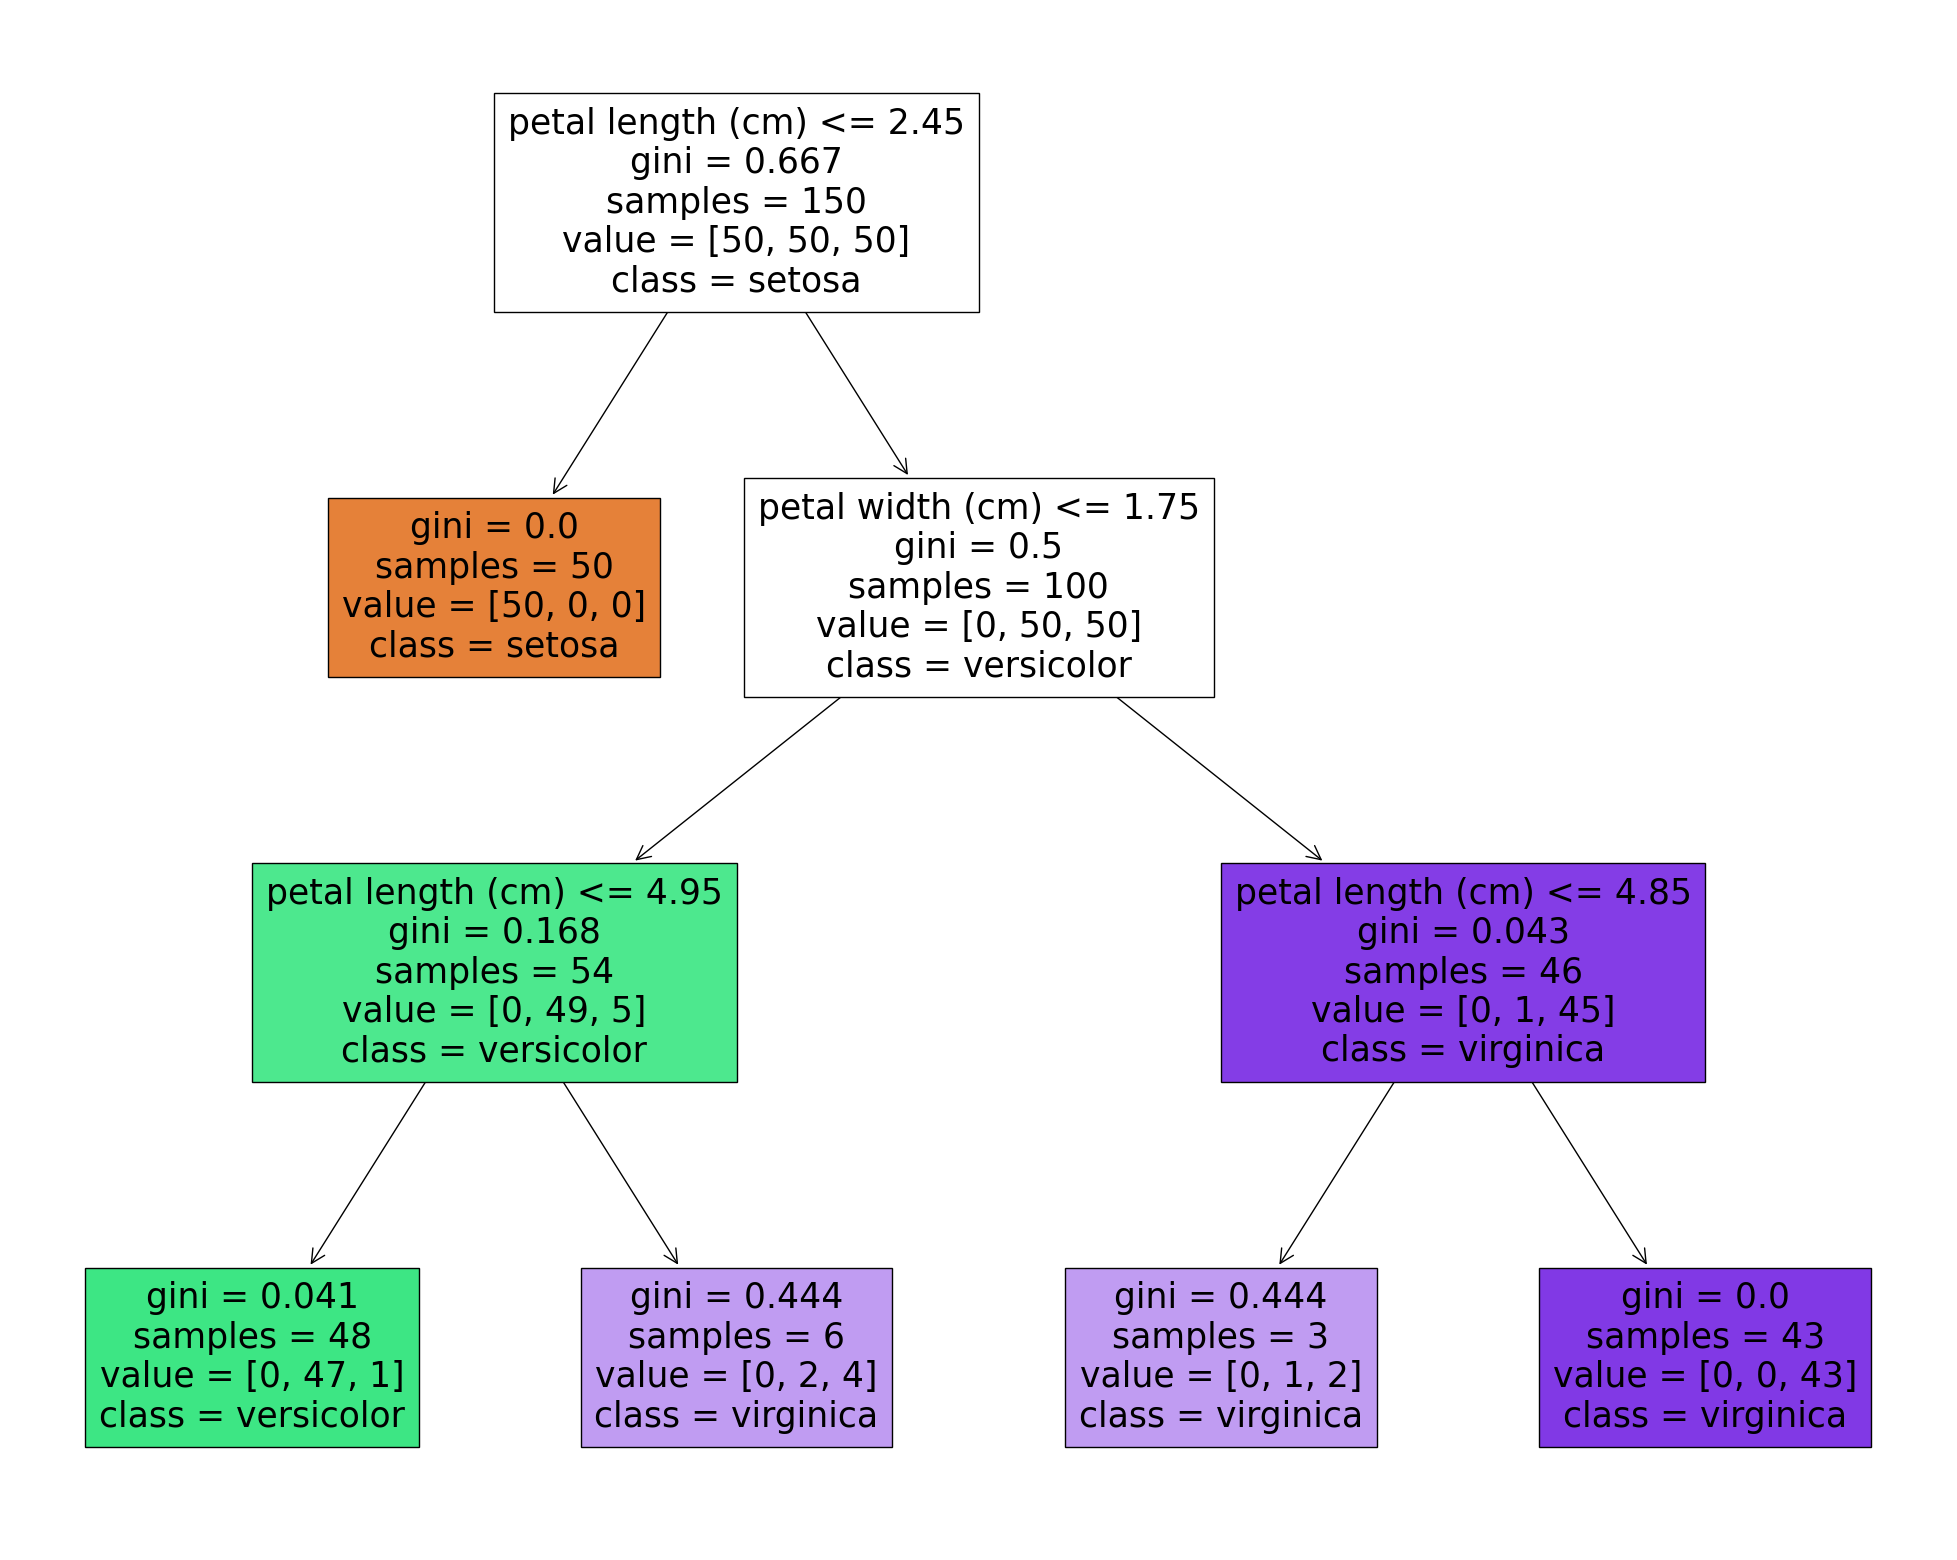

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [4]:
# регрессия

from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets


diab = datasets.load_diabetes()
X = diab.data
y = diab.target

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [5]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_8 <= -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_6 <= 0.02
|   |   |   |--- value: [108.80]
|   |   |--- feature_6 >  0.02
|   |   |   |--- value: [83.37]
|   |--- feature_2 >  0.01
|   |   |--- feature_0 <= -0.08
|   |   |   |--- value: [274.00]
|   |   |--- feature_0 >  -0.08
|   |   |   |--- value: [154.67]
|--- feature_8 >  -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_2 <= -0.02
|   |   |   |--- value: [137.69]
|   |   |--- feature_2 >  -0.02
|   |   |   |--- value: [176.86]
|   |--- feature_2 >  0.01
|   |   |--- feature_2 <= 0.07
|   |   |   |--- value: [208.57]
|   |   |--- feature_2 >  0.07
|   |   |   |--- value: [268.87]



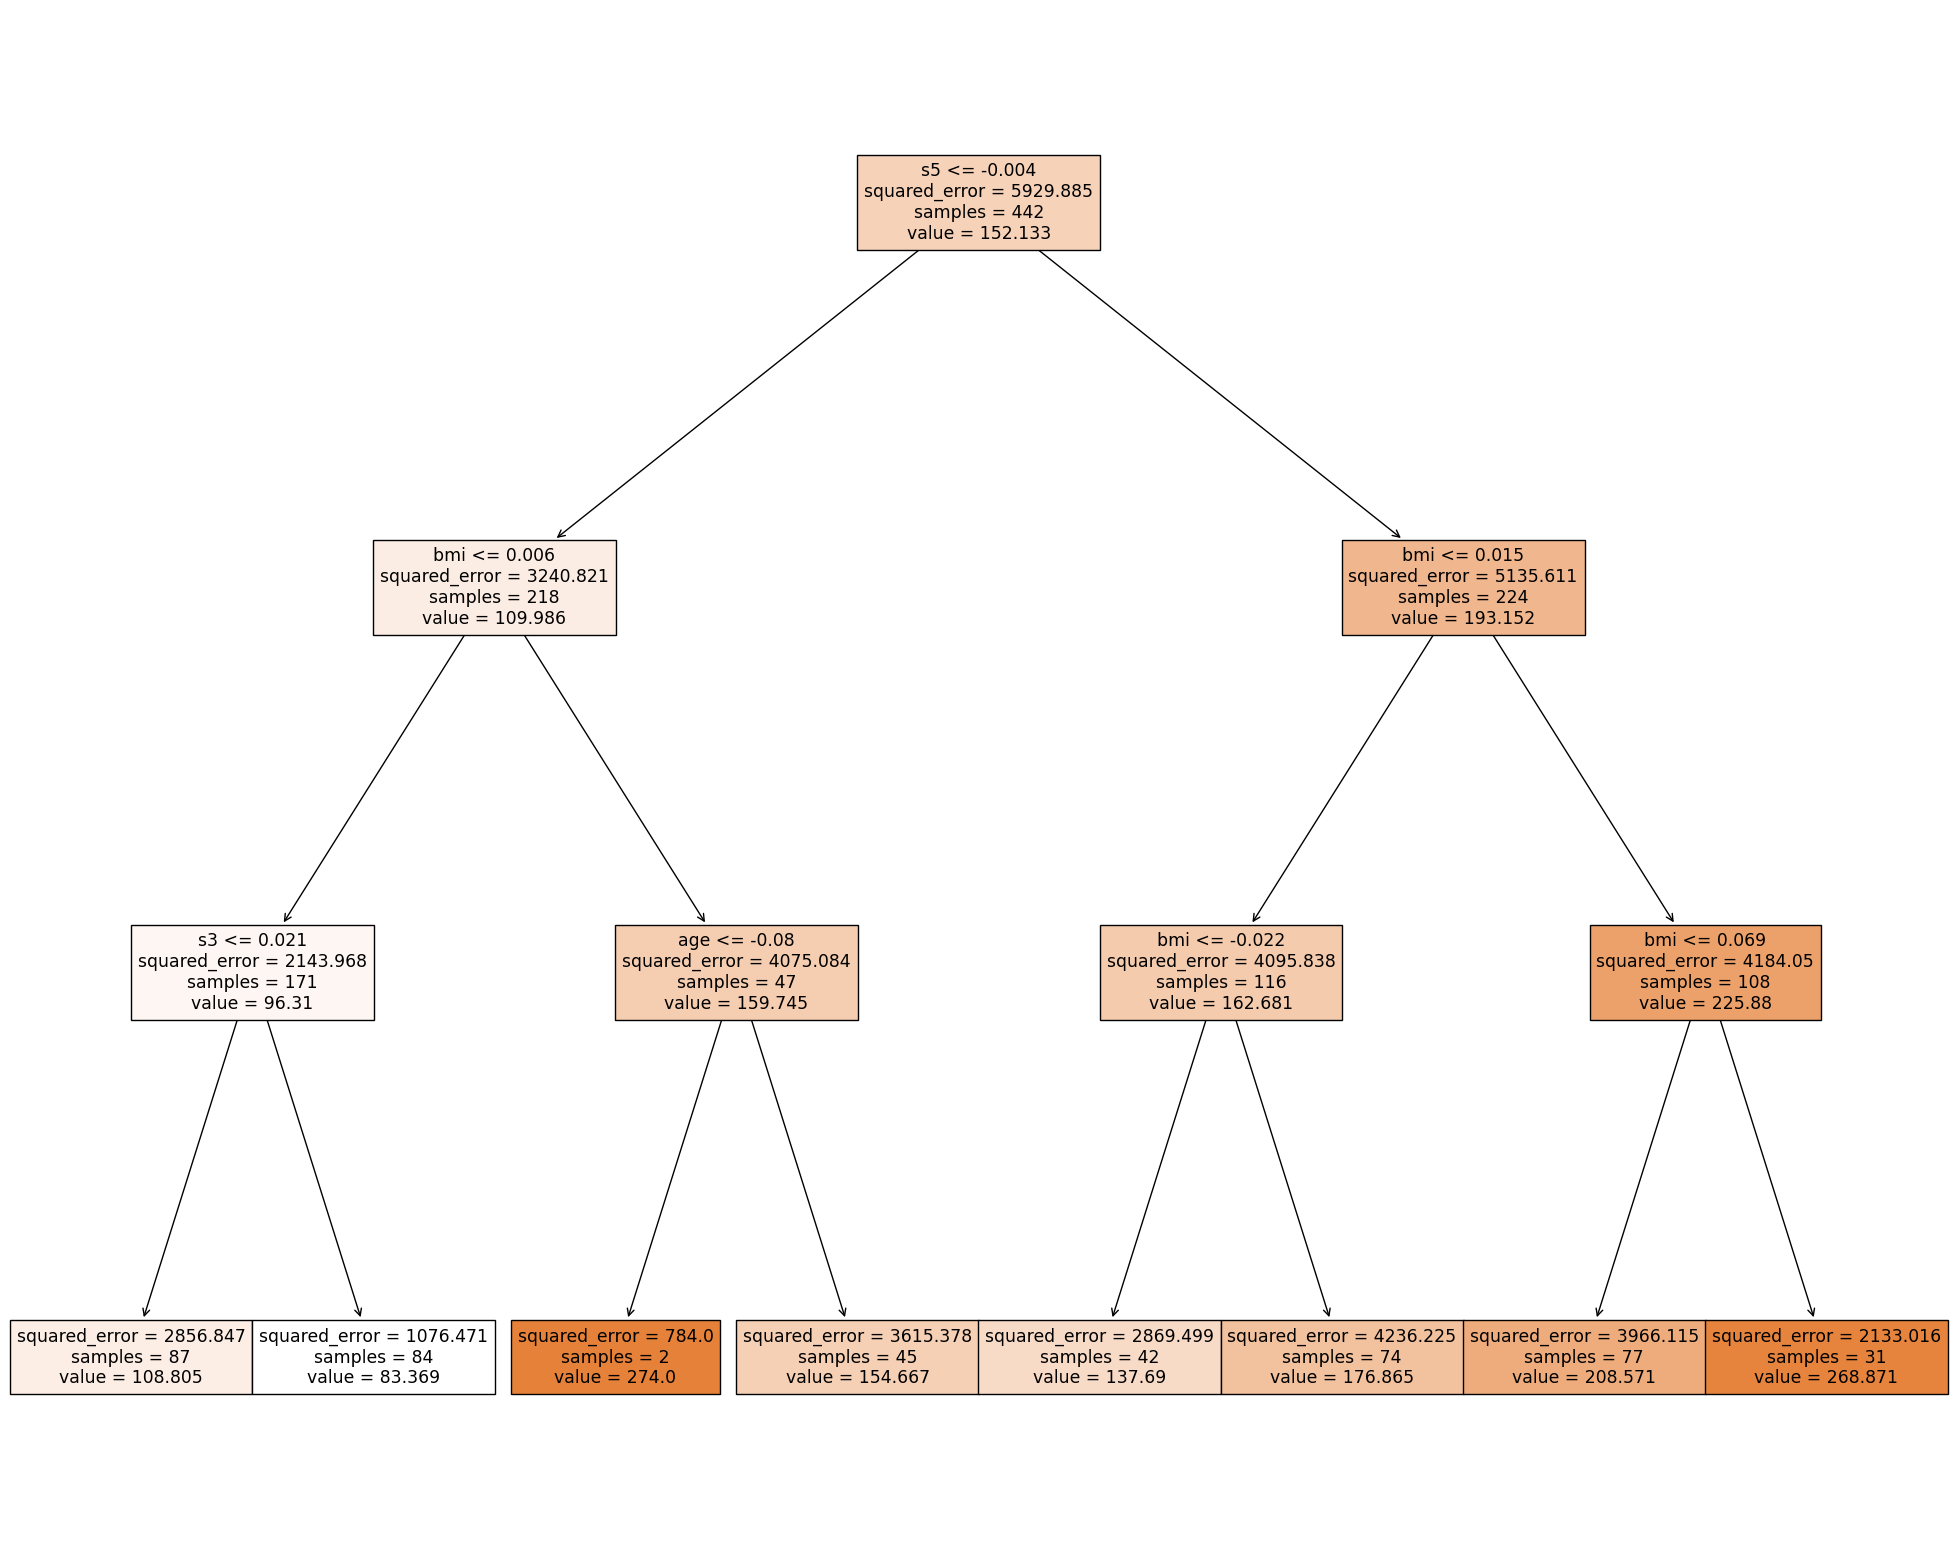

In [6]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=diab.feature_names, filled=True)

## Алгоритмы построения

**ID3** (Итеративный дихотомайзер 3) был разработан в 1986 году Россом Куинланом. 
Алгоритм создает дерево, находя для каждого узла (т. е. жадным способом) категориальный признак, который даст наибольший прирост информации. Деревья вырастают до максимального размера, а затем обычно применяется этап отсечения, чтобы улучшить способность дерева обобщать новые данные.

**C4.5** является преемником ID3 и убрал ограничение, согласно которому объекты должны быть категориальными, путем динамического определения дискретного атрибута (на основе числовых переменных), который разбивает непрерывное значение атрибута на дискретный набор интервалов. C4.5 преобразует обученные деревья (т. е. выходные данные алгоритма ID3) в наборы правил «если-то». Затем оценивается точность каждого правила, чтобы определить порядок их применения. Отсечение выполняется путем удаления предусловия правила, если точность правила улучшается без него.

**CART** (деревья классификации и регрессии) очень похож на C4.5, но отличается тем, что поддерживает числовые целевые переменные (регрессия) и не вычисляет наборы правил. CART строит бинарные деревья, используя признак и порог, которые дают наибольший прирост информации в каждом узле.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

Алгоритм CART
Строит бинарное дерево, где в узлах находится предикат, в листах находится ответ.
Задача -- минимизировать ошибку на каждом листе.

Алгоритм обучения упрощённо можно описать следующим образом:
0. Проверяем критерий остановки
1. Строим всевозможные разбиения на две подвыборки по одному признаку
2. Выбираем лучшее разбиение
3. Возвращаемся к шагу 0 для потомков
4. Проводим отсечение (pruning)

Описание алогритма: https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

# Ансамбли
(метаалгоритмы, композиции алгоритмов)

- Бэггинг
 - Метод случайного леса (англ. random forest)
- Бустинг
 - Бустинг над решающими деревьями
- стекинг

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Бэггинг

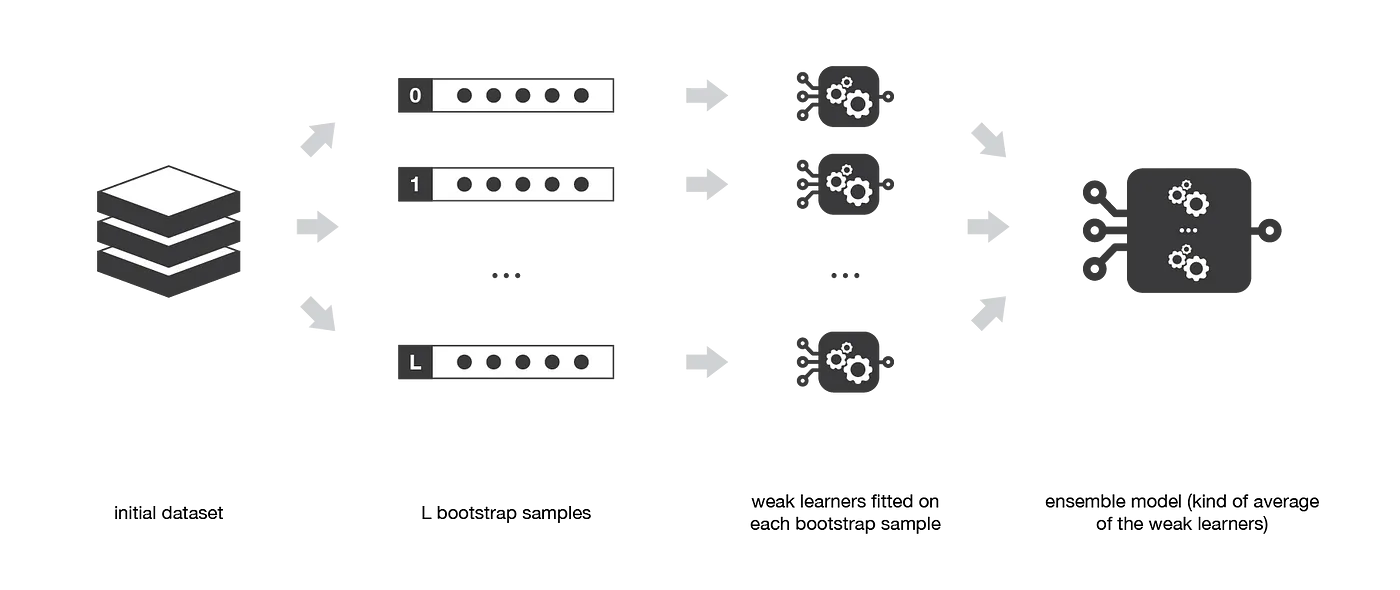

## Бустинг

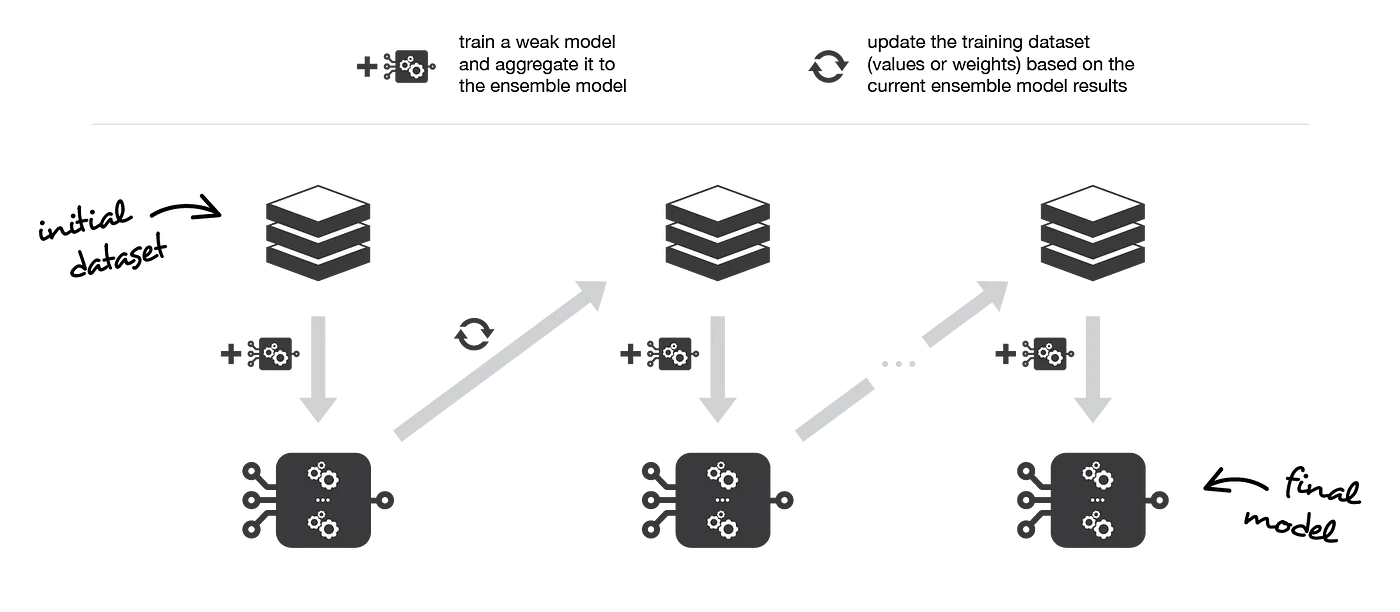

## Стекинг

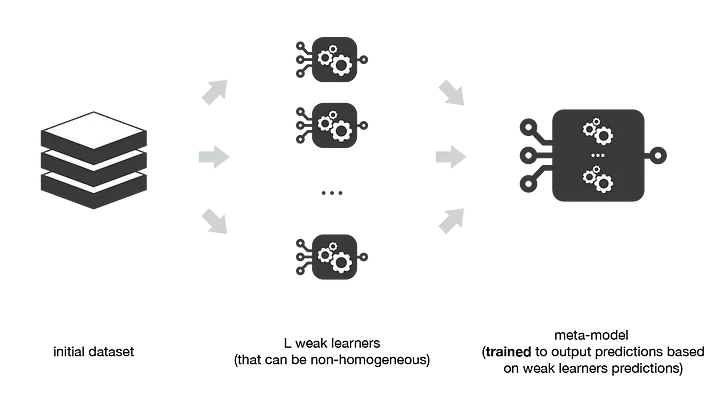

# Задание
  1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor
  3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

Не забывайте про подготовку датасетов и подбор гиперпараметров.

In [7]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('../data/trip_duration_task_obr.csv').sample(10000).reset_index(drop=True)
data1.drop(['Unnamed: 0'], axis=1, inplace=True)
data1

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1.0,1.465456e+09,1.465457e+09,1,-73.978455,40.752312,-73.969826,40.758598,580
1,2.0,1.464256e+09,1.464257e+09,1,-73.974640,40.759144,-73.963104,40.774143,475
2,1.0,1.456250e+09,1.456250e+09,1,-73.987366,40.755001,-73.954056,40.785530,603
3,1.0,1.467262e+09,1.467263e+09,2,-73.964874,40.755615,-73.989830,40.757298,1244
4,2.0,1.460788e+09,1.460788e+09,5,-73.980499,40.775078,-73.979256,40.764324,447
...,...,...,...,...,...,...,...,...,...
9995,2.0,1.462439e+09,1.462441e+09,1,-73.963058,40.772041,-73.962151,40.795372,1197
9996,2.0,1.464453e+09,1.464454e+09,2,-73.988297,40.756699,-73.988960,40.742458,697
9997,2.0,1.457672e+09,1.457673e+09,1,-73.969757,40.757671,-73.976059,40.763828,414
9998,2.0,1.457843e+09,1.457844e+09,1,-73.981552,40.780720,-73.988380,40.759899,402


In [8]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
from sklearn.model_selection import train_test_split

y1 = data1["trip_duration"]
X1 = data1.drop(["trip_duration"], axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=3)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

y1_pred = reg.predict(X1_test)
print(f'MAE: {mean_absolute_error(y1_test, y1_pred)}')
print(f'MSE: {mean_squared_error(y1_test, y1_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y1_test, y1_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y1_test, y1_pred)}')
print(f'R^2: {reg.score(X1_test, y1_test)}')

MAE: 523.246628890162
MSE: 5234227.8493866185
RMSE: 2287.843493201976
MAPE: 1.960191461447467
R^2: 0.013244926509015098


In [10]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_5 <= 40.64
|   |--- feature_1 <= 1452575104.00
|   |   |--- value: [1939736.00]
|   |--- feature_1 >  1452575104.00
|   |   |--- feature_7 <= 40.75
|   |   |   |--- value: [1544.86]
|   |   |--- feature_7 >  40.75
|   |   |   |--- value: [3708.62]
|--- feature_5 >  40.64
|   |--- feature_7 <= 41.05
|   |   |--- feature_4 <= -73.89
|   |   |   |--- value: [879.65]
|   |   |--- feature_4 >  -73.89
|   |   |   |--- value: [2118.17]
|   |--- feature_7 >  41.05
|   |   |--- value: [85828.00]



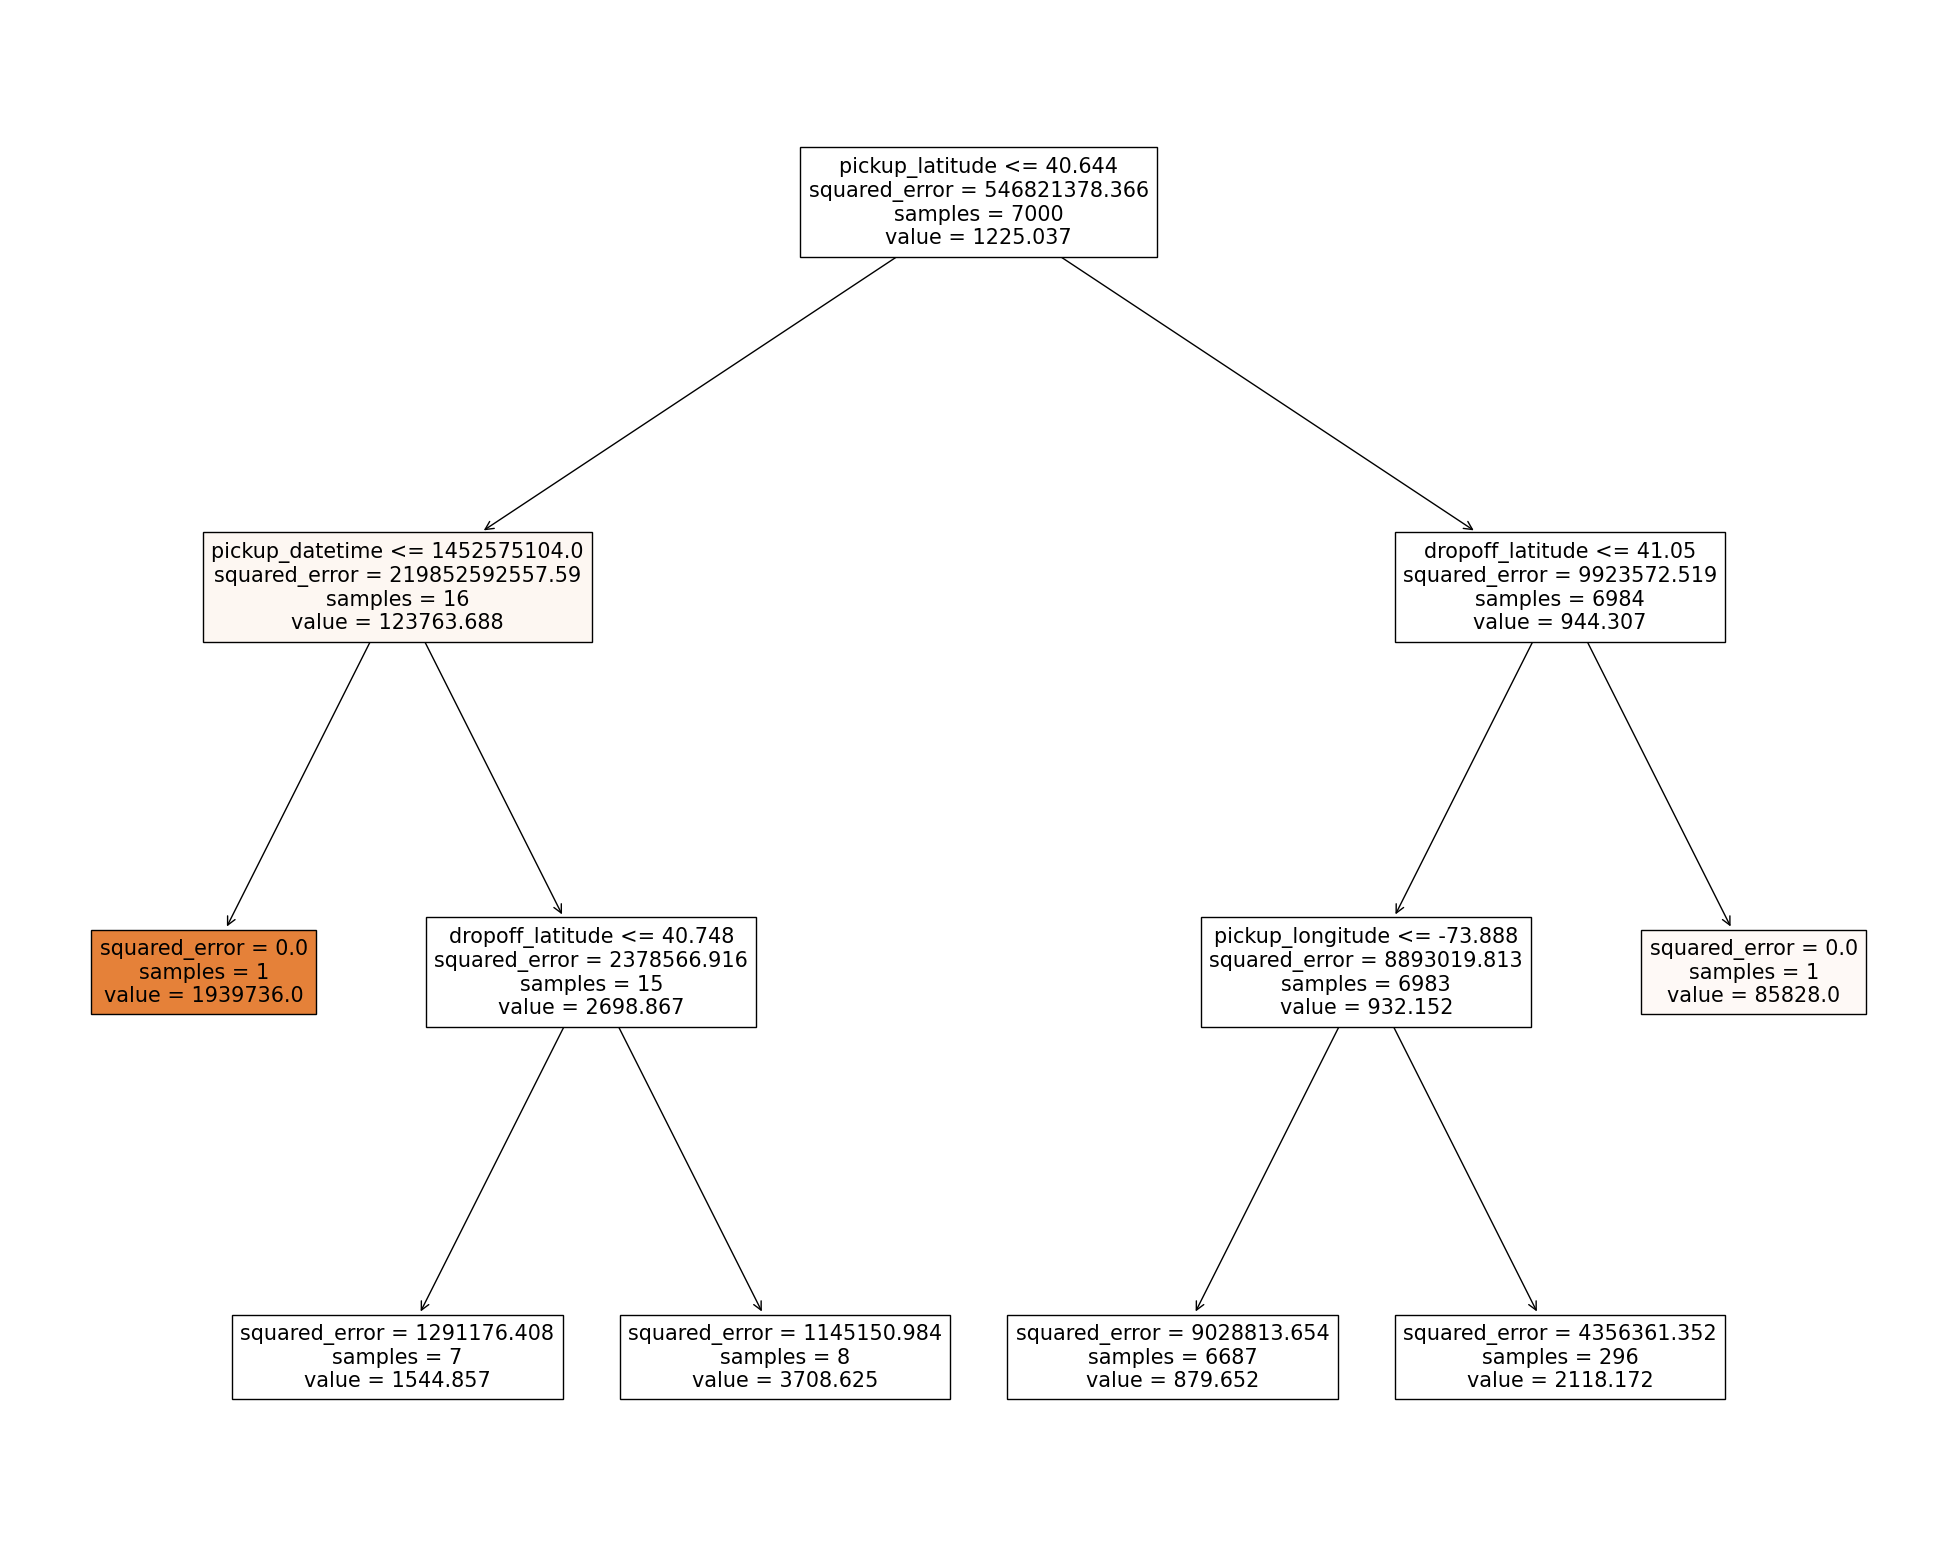

In [11]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=X1.columns, filled=True)

In [12]:
data2 = pd.read_csv('../data/csgo_task_obr.csv').sample(10000).reset_index(drop=True)
data2.drop(['Unnamed: 0'], axis=1, inplace=True)
data2

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,34.00,2.0,6.0,False,305.0,398.0,368.0,350.0,350.0,25800.0,2.0,3.0,0.0,4.0,4.0
1,30.14,5.0,6.0,True,200.0,144.0,180.0,190.0,7650.0,5650.0,2.0,2.0,2.0,2.0,2.0
2,169.95,8.0,5.0,False,500.0,500.0,196.0,0.0,19750.0,54800.0,0.0,0.0,0.0,5.0,5.0
3,114.93,13.0,13.0,False,500.0,500.0,500.0,300.0,16350.0,10350.0,5.0,3.0,3.0,5.0,5.0
4,21.57,14.0,13.0,True,68.0,111.0,100.0,180.0,2000.0,2200.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,97.55,8.0,13.0,False,450.0,500.0,486.0,491.0,500.0,7750.0,3.0,5.0,2.0,5.0,5.0
9996,94.85,5.0,11.0,False,498.0,500.0,398.0,500.0,1100.0,1250.0,4.0,5.0,0.0,5.0,5.0
9997,114.96,6.0,7.0,False,500.0,500.0,300.0,487.0,12250.0,17150.0,0.0,5.0,0.0,5.0,5.0
9998,74.92,18.0,17.0,False,100.0,389.0,100.0,398.0,150.0,8000.0,0.0,4.0,1.0,1.0,4.0


In [13]:
# классификация
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets

y2 = data2["bomb_planted"]
X2 = data2.drop(["bomb_planted"], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

y2_pred = clf.predict(X2_test)
accuracy_score(y2_test, y2_pred)

0.961

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      2685
        True       0.78      0.88      0.83       315

    accuracy                           0.96      3000
   macro avg       0.88      0.93      0.90      3000
weighted avg       0.96      0.96      0.96      3000



In [16]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 34.72
|   |--- feature_5 <= 299.50
|   |   |--- feature_0 <= 15.01
|   |   |   |--- class: True
|   |   |--- feature_0 >  15.01
|   |   |   |--- class: True
|   |--- feature_5 >  299.50
|   |   |--- feature_0 <= 15.04
|   |   |   |--- class: False
|   |   |--- feature_0 >  15.04
|   |   |   |--- class: False
|--- feature_0 >  34.72
|   |--- feature_0 <= 40.08
|   |   |--- feature_0 <= 34.98
|   |   |   |--- class: False
|   |   |--- feature_0 >  34.98
|   |   |   |--- class: True
|   |--- feature_0 >  40.08
|   |   |--- class: False



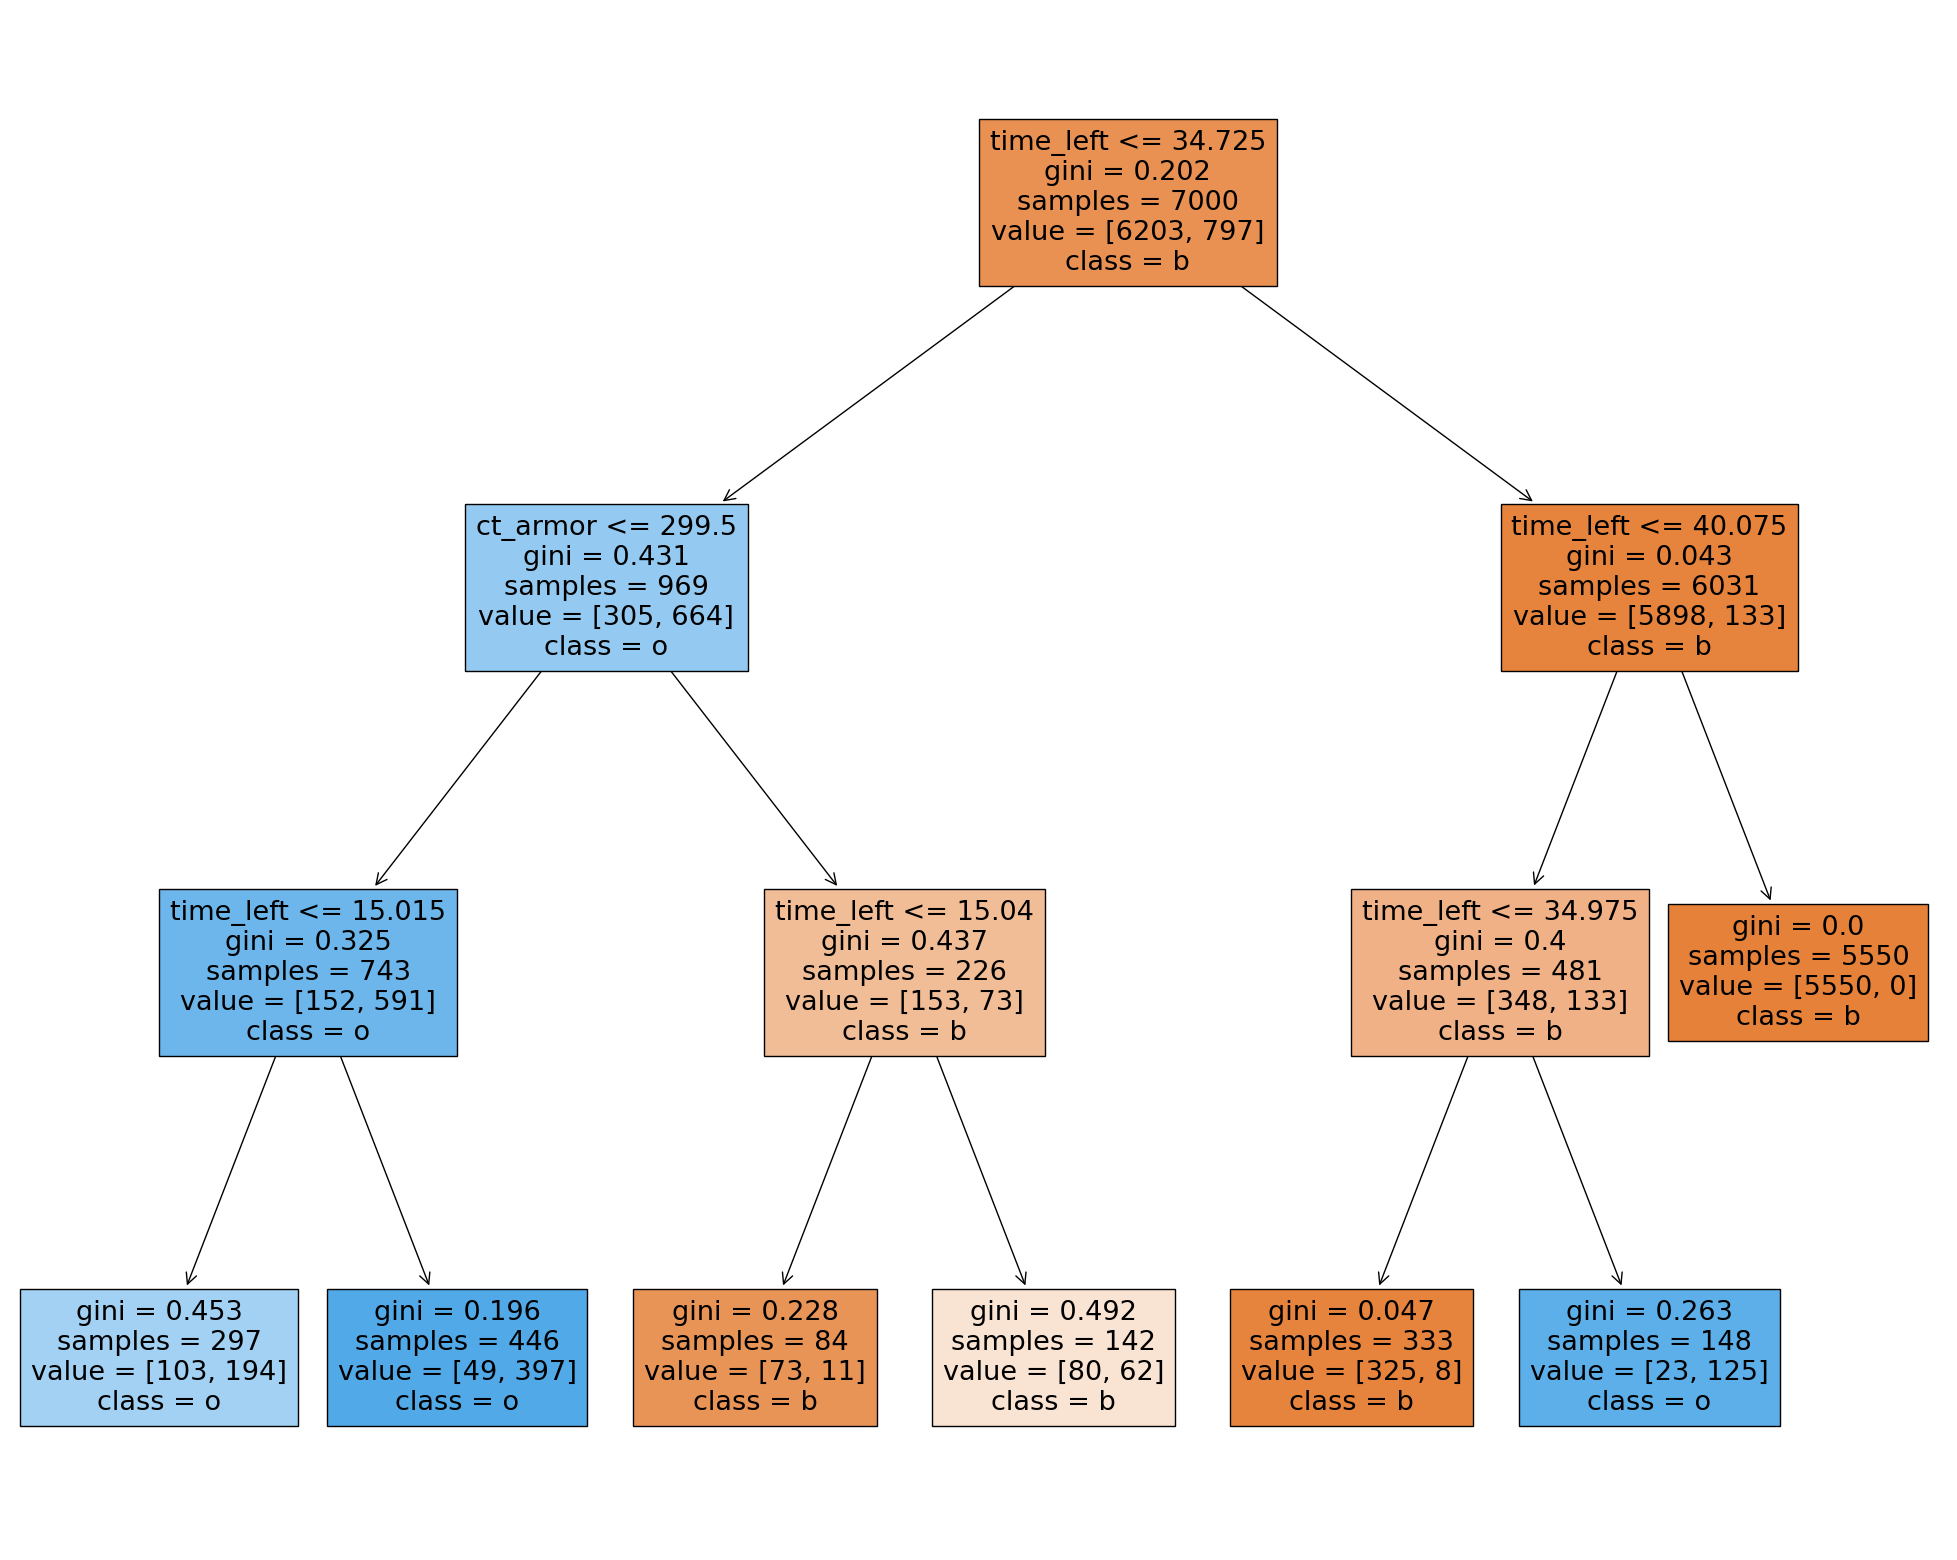

In [17]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X2.columns, class_names='bomb_planted', filled=True)

# Задание
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor

In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.svm import SVR


bag = BaggingRegressor()
n_estimators = [5, 100]
max_samples = [5, 10, 25]
max_features = [1, 2, 5]
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, max_features = max_features)
gridbag = RandomizedSearchCV(bag, hyperbag)
bestbag = gridbag.fit(X1_train, y1_train)
y_pred = bestbag.predict(X1_test)
print(bestbag.best_params_)
print(f'MAE: {mean_absolute_error(y1_test, y_pred)}')
print(f'MSE: {mean_squared_error(y1_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y1_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y1_test, y_pred))}')
print(f'R^2: {bestbag.score(X1_test, y1_test)}')

{'n_estimators': 5, 'max_samples': 25, 'max_features': 5}
MAE: 482.14493333333326
MSE: 5236920.438373333
RMSE: 2288.4318732209035
MAPE: 1.6584725685998443
R^2: 0.012737320436081667


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
n_estimators = [5, 100]
max_samples = [5, 10, 25]
max_features = [1, 2, 5]
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, max_features = max_features, )
gridbag = RandomizedSearchCV(bag, hyperbag)
bestbag = gridbag.fit(X2_train, y2_train)
predictions = bestbag.predict(X2_test)

print(bestbag.best_params_)
print(accuracy_score(y2_test, predictions))
print(confusion_matrix(y2_test, predictions))
print(precision_score(y2_test, predictions))
print(recall_score(y2_test, predictions))
print(f1_score(y2_test, predictions))

{'n_estimators': 100, 'max_samples': 25, 'max_features': 5}
0.9243333333333333
[[2646   39]
 [ 188  127]]
0.7650602409638554
0.4031746031746032
0.5280665280665281


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor()
n_estimators = [20, 30]
max_depth = np.arange(1, 7, 2)
learning_rate = np.arange(0,1,0.2)
hyperGrad = dict(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth)
grid = RandomizedSearchCV(grad, hyperGrad)
bestmodel = grid.fit(X1_train, y1_train)
y_pred = bestmodel.predict(X1_test)
print(bestmodel.best_params_)
print(f'MAE: {mean_absolute_error(y1_test, y_pred)}')
print(f'MSE: {mean_squared_error(y1_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y1_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y1_test, y_pred))}')
print(f'R^2: {bestmodel.score(X1_test, y1_test)}')

{'n_estimators': 20, 'max_depth': 3, 'learning_rate': 0.0}
MAE: 701.6144753333333
MSE: 5407695.467005273
RMSE: 2325.445219093598
MAPE: 2.4041443040359964
R^2: -0.01945713704208929


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
n_estimators = [20, 30]
max_depth = np.arange(1, 10, 2)
learning_rate = np.arange(0,1,0.1)
hyperGrad = dict(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth)
grid = RandomizedSearchCV(grad, hyperGrad)
bestmodel = grid.fit(X2_train, y2_train)
predictions = bestmodel.predict(X2_test)
print(bestmodel.best_params_)
print(accuracy_score(y2_test, predictions))
print(confusion_matrix(y2_test, predictions))
print(precision_score(y2_test, predictions))
print(recall_score(y2_test, predictions))
print(f1_score(y2_test, predictions))

{'n_estimators': 30, 'max_depth': 5, 'learning_rate': 0.2}
0.9753333333333334
[[2645   40]
 [  34  281]]
0.8753894080996885
0.8920634920634921
0.8836477987421384


In [53]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
estimators = [('lr', Ridge()),('svr', LinearSVR())]
parameters = {'lr__alpha': np.arange(0, 1, 0.1),'svr__C': np.arange(1, 9, 3),'final_estimator__max_depth': [1,5]}
stackinReg = StackingRegressor(
estimators=estimators,
final_estimator=RandomForestRegressor())
grid = RandomizedSearchCV(estimator=stackinReg, param_distributions=parameters )
bestmodel = grid.fit(X1_train, y1_train)
y_pred = bestmodel.predict(X1_test)
print(bestmodel.best_params_)
print(f'MAE: {mean_absolute_error(y1_test, y_pred)}')
print(f'MSE: {mean_squared_error(y1_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y1_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y1_test, y_pred))}')
print(f'R^2: {bestmodel.score(X1_test, y1_test)}')

C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3727e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.51709e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47884e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30686e-17)

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.29217e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47758e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.57803e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3754e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40345e-17)

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.65662e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.61497e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.72024e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.65645e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53214e-17

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.39203e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.74049e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.77129e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60759e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.66769e-17

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.45955e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30755e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40395e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3479e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3112e-17):

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.61883e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.67935e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.64208e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.46912e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53388e-17

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.42297e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.53177e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6319e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.42885e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.45765e-17)

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.69984e-17): re

C:\machine_learning\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.67008e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.77498e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.71123e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.58619e-17

{'svr__C': 4, 'lr__alpha': 0.9, 'final_estimator__max_depth': 5}
MAE: 85.3082207987311
MSE: 25890.42417525629
RMSE: 160.90501600402732
MAPE: 0.3076997122486796
R^2: 0.9951191449541575


In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
estimators = [('knn', KNeighborsClassifier(n_neighbors=5)),('rfc', RandomForestClassifier())]
params = {'knn__n_neighbors': [3,5,9],'rfc__n_estimators': [20, 30],'rfc__max_depth': np.arange(1, 10, 2),'final_estimator__C': np.arange(1, 10, 2)} 
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
grid = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='accuracy', )
bestmodel = grid.fit(X2_train, y2_train)
predictions = bestmodel.predict(X2_test)
print(bestmodel.best_params_)
print(accuracy_score(y2_test, predictions))
print(confusion_matrix(y2_test, predictions))
print(precision_score(y2_test, predictions))
print(recall_score(y2_test, predictions))
print(f1_score(y2_test, predictions))

{'rfc__n_estimators': 30, 'rfc__max_depth': 9, 'knn__n_neighbors': 9, 'final_estimator__C': 1}
0.961
[[2632   53]
 [  64  251]]
0.8256578947368421
0.7968253968253968
0.8109854604200323


# Задание
  3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)

In [26]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

model1 = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

print(f'MAE: {mean_absolute_error(y1_test, y1_pred)}')
print(f'MSE: {mean_squared_error(y1_test, y1_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y1_test, y1_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y1_test, y1_pred)}')
print(f'R^2: {model1.score(X1_test, y1_test)}')

0:	learn: 2875.3989629	total: 151ms	remaining: 151ms
1:	learn: 2857.5469372	total: 153ms	remaining: 0us
MAE: 575.507477904199
MSE: 11875084.969176736
RMSE: 3446.0245166244445
MAPE: 1.20294300790329
R^2: 0.010825980288571624


In [27]:
def i(x):
    return int(x)
y2=y2.map(i)
y2

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: bomb_planted, Length: 10000, dtype: int64

In [28]:
from catboost import CatBoostClassifier

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

model2 = CatBoostClassifier(iterations=2, learning_rate=1, depth=2)

model2.fit(X2_train, y2_train)
preds_class = model2.predict(X2_test)
preds_proba = model2.predict_proba(X2_test)
preds_raw = model2.predict(X2_test, prediction_type='RawFormulaVal')

0:	learn: 0.2262055	total: 4.59ms	remaining: 4.59ms
1:	learn: 0.1495065	total: 7.86ms	remaining: 0us


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

y22_pred = model2.predict(X2_test)
accuracy_score(y2_test, y22_pred)

0.9293333333333333

In [34]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # метрику влепить
knn.fit(X2_train, y2_train)
y_bin_knn_pred = knn.predict(X2_test)
print(classification_report(y2_test, y_bin_knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2656
           1       0.56      0.34      0.43       344

    accuracy                           0.89      3000
   macro avg       0.74      0.65      0.68      3000
weighted avg       0.88      0.89      0.88      3000



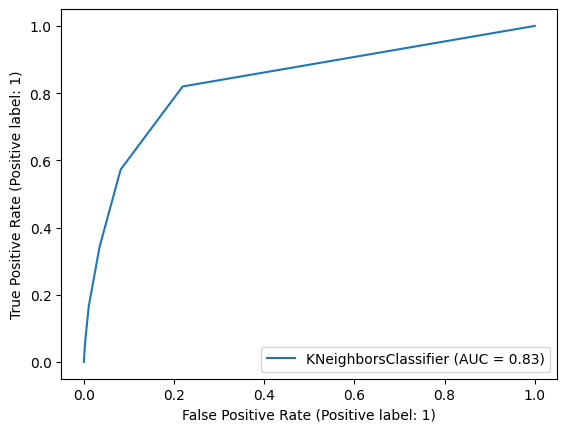

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn, X2_test, y2_test)

# Задание
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.

In [56]:
from sklearn.metrics import r2_score

In [61]:
from collections import Counter
from sklearn.datasets import make_regression, make_classification
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=3, n_features=None, isRegression = False):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
        self.isRegression = isRegression

    def fit(self, X, y):
        if self.isRegression:
            self.mode = "mse"
        else:
            self.mode = "entropy"
        self.n_features = X.shape[1]
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            if self.isRegression:
                leaf_value = np.mean(y)
            else:
                leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
    
        if self.mode == "entropy":
            parent_entropy = self._entropy(y)
            e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
            child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
            information_gain = parent_entropy - child_entropy
        else:
            information_gain = self.mean_squared_error(y) - ((n_l/n)*self.mean_squared_error(y[left_idxs]) + (n_r/n)*self.mean_squared_error(y[right_idxs]))
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    def mean_squared_error(self, y):
        mean = np.mean(y)
        mse = np.mean((y - mean)**2)
        return mse

In [59]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTree()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))




X, y = make_regression(n_samples=1000, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = DecisionTree(isRegression = True)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, predictions))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, predictions))}')
print(f'R^2: {r2_score(y_test, predictions)}')

1.0
[[12  0]
 [ 0  8]]
1.0
1.0
1.0
MAE: 8.671920475483443
MSE: 111.3206610003922
RMSE: 10.550860675811817
MAPE: 1.516366791637903
R^2: 0.9343792206815442


# Задание
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

In [80]:
import numpy as np
from sklearn.base import clone
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [94]:
## make an ensemble classifier based on decision trees ##
class BaggedTreeClassifier(object):
    #initializer
    def __init__(self,n_elements=100):
        self.n_elements = n_elements
        self.models     = []
    
    #destructor
    def __del__(self):
        del self.n_elements
        del self.models
        
    #private function to make bootstrap samples
    def __make_bootstraps(self,data):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_elements):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
    
    
    def get_params(self, deep = False):
        return {'n_elements':self.n_elements}

    #train the ensemble
    def fit(self,X_train,y_train,print_metrics=False):
        X_train=X_train.to_numpy()
        y_train=y_train.to_numpy()
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #initialise metric arrays
        accs = np.array([])
        pres = np.array([])
        recs = np.array([])
        #iterate through each bootstrap sample & fit a model ##
        cls = DecisionTreeClassifier(class_weight='balanced')
        for b in dcBoot:
            #make a clone of the model
            model = clone(cls)
            #fit a decision tree classifier to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.models.append(model)
            #compute the predictions on the out-of-bag test set & compute metrics
            if dcBoot[b]['test'].size:
                yp  = model.predict(dcBoot[b]['test'][:,:-1])
                acc = accuracy_score(dcBoot[b]['test'][:,-1],yp)
                pre = precision_score(dcBoot[b]['test'][:,-1],yp)   
                rec = recall_score(dcBoot[b]['test'][:,-1],yp)
                #store the error metrics
                accs = np.concatenate((accs,acc.flatten()))
                pres = np.concatenate((pres,pre.flatten()))
                recs = np.concatenate((recs,rec.flatten()))
        #compute standard errors for error metrics
        if print_metrics:
            print("Standard error in accuracy: %.2f" % np.std(accs))
            print("Standard error in precision: %.2f" % np.std(pres))
            print("Standard error in recall: %.2f" % np.std(recs))
            
    #predict from the ensemble
    def predict(self,X):
        #check we've fit the ensemble
        if not self.models:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.models:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.round(np.mean(np.concatenate(predictions,axis=1),axis=1)).astype(int)
        #return the prediction
        return(ypred)

In [95]:
ens = BaggedTreeClassifier()
ens.fit(X2_train,y2_train,print_metrics=True)

Standard error in accuracy: 0.00
Standard error in precision: 0.02
Standard error in recall: 0.03


Доп. ссылки:

* https://www.youtube.com/watch?v=kqJ03kWuvO0
* https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya
* https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii
* https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting
* https://medium.com/@abedinia.aydin/survey-of-the-decision-trees-algorithms-cart-c4-5-id3-97df842831cd
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* https://basegroup.ru/community/articles/math-cart-part1#comments

In [36]:
class Node():
    def __init__(self, feature_index=None, threshold=None, right=None, left=None,  info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.right = right
        self.left = left
        self.info_gain = info_gain
        self.value = value


class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["info_gain"])
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf") # Инициализировали как -бесконечность, т.к. надо максимизировать прирост инфы.
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, 'gini')
                    if curr_info_gain>max_info_gain:
                        best_split['feature_index'] = feature_index
                        best_split['threshold'] = threshold
                        best_split['dataset_left'] = dataset_left
                        best_split['dataset_right'] = dataset_right
                        best_split['info_gain'] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode='entropy'):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=='gini':
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=' '):

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), '<=', tree.threshold, '?', tree.info_gain)
            print("%sleft:" % (indent), end='')
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end='')
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


In [37]:
classifier = DecisionTreeClassifier(min_samples_split=5, max_depth=5)
classifier.fit(X2_train, y2_train)
classifier.print_tree()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)